<a href="https://colab.research.google.com/github/Haanaahh/CUSTOMER_CHURN_PREDICTION/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER CHURN PREDICTION**

Customer Churn Prediction means when a customer stops using the services or any sort of interacts with the company.
So the company must look innto that why customers are churning from them. what is the reason and the company must sort all this eventually.
Churning of customers may face a great loss in the company and also effect the reputation when may lead to no new customers. Getting new customer is a really hard . To attract the services it may cost more.

So identify the patterns why and what make the customer churn and solve the problem accoding to it.

##  **2. EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,  classification_report


import all neccessary libraries

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

reading the dataset

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head(10) # to get 1st 10 data from the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.shape # number of rows and columns

(7043, 21)

In [6]:
df.columns # columns names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes # the datatype of all the columns

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


there  is only 3 numeric (float , int)
Monthly charges, SeniorCitizen, tenure

In [8]:
df.info() # check null values , dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

# there is no null value in any dataset so its considered to be clean)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.nunique() # count of unique number data

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000




*  SENIOR CITIZEN-
  - Count of customers is 7043
  -  mean is 16 % is senior citizen
  - its in binary format 0s and 1s ( min and max)

*  TENURE (MONTHS)
  - Count of customers is 7043
  - mean or avg is 32 months
  - 0 -72 months (min-max)



*  MONTHLY CHARGE
  - Count of customers is 7043
  - mean or the avg customers pay Rs.64 monthly
  - standard deviation Rs is 30 which means most customers pay this amount.
  - Monthly charge starts from RS 18 - 118 per month






In [12]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### **VISUALIZATON**

HISTPLOT - DISTRIBUTION B/W CHURN BASED ON TENURE

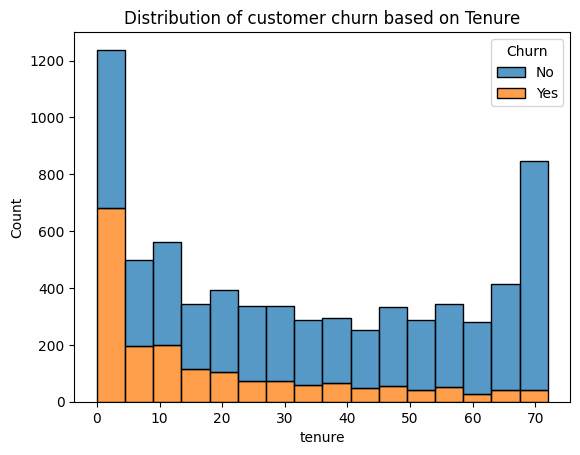

In [13]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Distribution of customer churn based on Tenure')
plt.show()

So here in this graph


*   ORANGE indicates customers who churned
*   BLUE indicates customers who stayed

  x-axis shows the tenure which means the months like the graph show upto 70 so its aprx 5-6 years

  y-axis shows the count of customers

So at the basic observation 0-10 months is some what critical there is high chance that customers churn. and at the long term customer is more likely into it there is more loyal customers in long term

- So more focus to the 1 st 10 months on new customer


BARPLOT - DISTRIBUTION B/W CHURN BASED ON GENDER

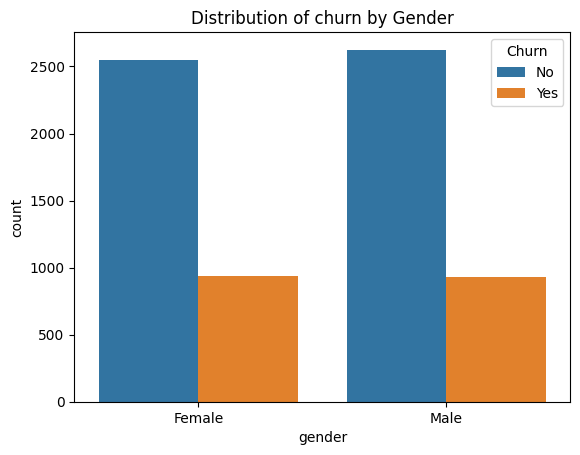

In [14]:
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Distribution of churn by Gender')
plt.show()

So here in this graph


*   ORANGE indicates customers who churned
*   BLUE indicates customers who stayed

x-axis - there is 2 gender male and female

y-axis - number of customers

Based on the observation both male and female customer count is almost same and even churned also is almost same. So churning is not because of the gender other issue



BARPLOT - DISTRIBUTION OF CUSTOMER CHURN BASED ON THE INTERNET SERVICE TYPE

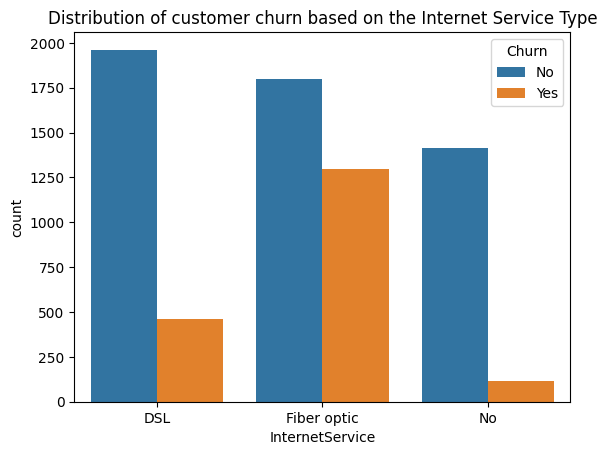

In [15]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Distribution of customer churn based on the Internet Service Type')
plt.show()

So here in this graph


*   ORANGE indicates customers who churned
*   BLUE indicates customers who stayed

x-axis - there is DSL , fiber optic Internet service and No internet service

y-axis - number of customers

Based on the observation most customer is churning after using fiber optic internet service and comparitivly DSL is better there is more count or customer using that and churning is far better than FiberOptic.
the lowest churned rate comes under no internet.
So the increase in churning by fiber optic may be because of cost , services etc

CORRELATION HEATMAP

In [16]:
num_df = df.select_dtypes(include=['float64', 'int64'])

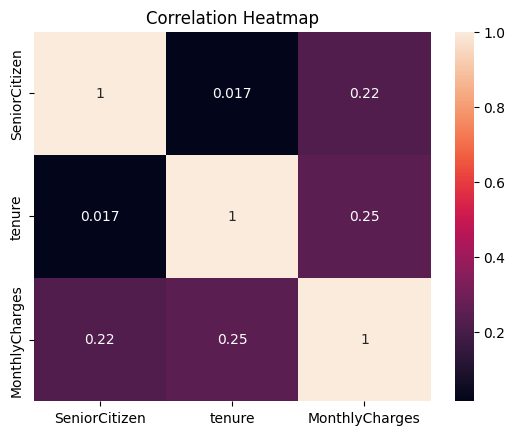

In [17]:
sns.heatmap(num_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Here the more the value decrease from 1-0 the value and the correlation decrease
- There is no strong bond . So the issue must be with the service,cost etc.

BARPLOT - CHURNED CUSTOMER BASED ON THE PAYMENT METHOD

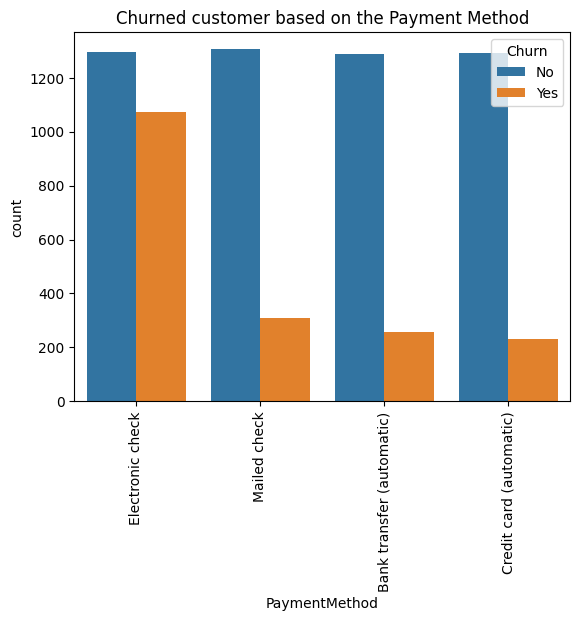

In [18]:
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churned customer based on the Payment Method')
plt.xticks(rotation=90)
plt.show()

So here in this graph

ORANGE indicates customers who churned

BLUE indicates customers who stayed

x-axis - there is Electronic check , Mailed check , bank transfer , credit card

y-axis - number of customers

Based on the observation almost every payment method has approximately same count but Electronic check based churning is more. and the least churning is by credit card.
Automatic Bank transfer and credit card gives less churning and this 2 catogory is more likely to stay.

BARPLOT- DISTRIBUTION CHURN CUSTOMER BASED ON THE CONTRACT TYPE

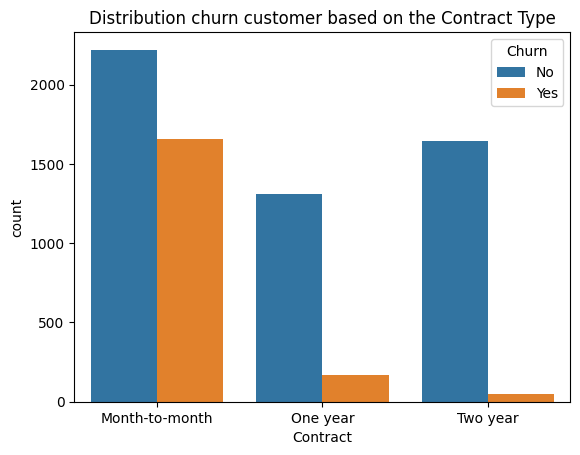

In [19]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Distribution churn customer based on the Contract Type')
plt.show()


So here in this graph

ORANGE indicates customers who churned

BLUE indicates customers who stayed

x-axis - there is month to month , one year contract , two year

y-axis - number of customers

Insights:
month to month churning is high. new customers are not satisfied with the services or anything , they can cancel at anytime.So by increasing long term subscrition the problem can be solved

In [20]:
df.columns # Column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df = df.drop(columns=['customerID',])

droping a column named customer ID because for prediction this data is not required . it will not make any change

In [22]:
df.columns # checking after dropping

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
encoded= pd.get_dummies(df)

One hot Ecoding is used to change char to numerics.because machine can learn only using binary format .

In [24]:
encoded

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0,34,56.95,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,2,53.85,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,2,70.70,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
7039,0,72,103.20,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
7040,0,11,29.60,True,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,False
7041,1,4,74.40,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True


after one hot encode there will be churn yes and churn no. So our main prediction is depended on churning . So taking churn_yes to prediction

drop the column churn_yes from x feature

In [25]:
x = encoded.drop(columns=['Churn_Yes']) # Feature
x

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No
0,0,1,29.85,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1,0,34,56.95,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,2,53.85,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,False,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,0,2,70.70,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
7039,0,72,103.20,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
7040,0,11,29.60,True,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,True
7041,1,4,74.40,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
y=encoded['Churn_Yes'] # Target
y

,Churn_Yes
0,False
1,False
2,True
3,False
4,True
...,...
7038,False
7039,False
7040,False
7041,True


In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42)

- x contain all columns except Churn_yes
- y contain only Churn_yes
- train_test_split - to split data for training and testing
- test_size=0.2 means 20% data is used to test and other 80% to train ,

checking the rows and columns

In [28]:
y_train.shape

(5634,)

In [29]:
x_train.shape

(5634, 6576)

In [30]:
x_test.shape

(1409, 6576)

In [31]:
y_test.shape

(1409,)

### **Random Forest Classifier**



In [32]:
rfm = RandomForestClassifier(random_state=42)
rfm

RandomForestClassifier(random_state=42)

In [33]:
rfm.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

### **LOGISTIC REGRESSION**

In [34]:
log_reg = LogisticRegression(max_iter=1000)
log_reg

LogisticRegression(max_iter=1000)

In [35]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred_rfm = rfm.predict(x_test)
y_pred_rfm

array([ True, False, False, ..., False, False,  True])

y_pred to make prediction on the test data x_test

In [37]:
y_pred_logreg = log_reg.predict(x_test)
y_pred_logreg

array([ True, False, False, ..., False, False,  True])

### **PREDICTION ON RANDOM FOREST CLASSIFIERS**

In [38]:
print(" Random Forest Classifier ")
print(" Accuracy: ",accuracy_score(y_test,y_pred_rfm))
print(" Classification Report:\n ",classification_report(y_test,y_pred_rfm))
print(" Confusion Matrix:\n ", confusion_matrix(y_test,y_pred_rfm))

 Random Forest Classifier 
 Accuracy:  0.9758694109297374
 Classification Report:
                precision    recall  f1-score   support

       False       0.97      1.00      0.98      1036
        True       1.00      0.91      0.95       373

    accuracy                           0.98      1409
   macro avg       0.98      0.95      0.97      1409
weighted avg       0.98      0.98      0.98      1409

 Confusion Matrix:
  [[1036    0]
 [  34  339]]


- Accuracy of this model is 97% which is great
- the model predicted 1036 will not churn
- model predicted 0 will charn but didnt charn
-  prediction told 34 will stay but they left
- 339 left and the model told they will churn

In [39]:
print(" Logistic Regression ")
print(" Accuracy: ",accuracy_score(y_test,y_pred_logreg))
print(" Classification Report:\n ",classification_report(y_test,y_pred_logreg))
print(" Confusion Matrix:\n ", confusion_matrix(y_test,y_pred_logreg))

 Logistic Regression 
 Accuracy:  1.0
 Classification Report:
                precision    recall  f1-score   support

       False       1.00      1.00      1.00      1036
        True       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

 Confusion Matrix:
  [[1036    0]
 [   0  373]]


- accuracy is 100% , its rare to get 100%  maybe the data is to easy or data might be overfitted

In [42]:
sc = cross_val_score(log_reg, x, y, cv=5)

cv=5 means dataset is splited into 5 part

In [43]:
print("Average accuracy:", sc.mean())
print("Cross-validation scores:", sc)

Average accuracy: 1.0
Cross-validation scores: [1. 1. 1. 1. 1.]


The predictions is 100 % for real and it might be simple and easy for the machine to learn .

In [44]:
importances = rfm.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [45]:
print(feature_importance)

                      Feature  Importance
6575                 Churn_No    0.351078
1                      tenure    0.060467
2              MonthlyCharges    0.045460
35    Contract_Month-to-month    0.024133
17          OnlineSecurity_No    0.018845
...                       ...         ...
3357     TotalCharges_3871.85    0.000000
3358      TotalCharges_3874.1    0.000000
3359      TotalCharges_3875.4    0.000000
1954     TotalCharges_2274.35    0.000000
3104        TotalCharges_3532    0.000000

[6576 rows x 2 columns]


**Influence of customer churning**

So the reasons behind the churning by the customers is how importance show .
tenture , monthly charges,moth to month contract and so on is the reason for churning

**RECOMMENTATION**

- Tenure - give customer a short tenure with great services and discounts
- Monthly Charges - give affortable plans
- Month -to -month - give them 5-6 month tenure not more like a year or less like months.
- Online Security - provide great security services.

all this recommendation may earn less churning comparitively.

---------------- END------------------